In [5]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns


In [6]:
school_csr_df = pd.read_csv("LA_cities_school_ranking.csv",encoding = "ISO-8859-1")
#zipcodes_df = zipcodes_df.rename(columns={"zip": "Zipcode","County":"City"})

school_csr_df.head()

,CITY,SCHOOL_RAW,SCHOOL,CSR
0,Alhambra,Alhambra High CSR rank: 8,Alhambra High,8
1,Alhambra,Century High CSR rank: 3,Century High,3
2,Alhambra,Emery Park Elementary CSR rank: 7,Emery Park Elementary,7
3,Alhambra,Fremont Elementary CSR rank: 5,Fremont Elementary,5
4,Alhambra,Garfield Elementary CSR rank: 8,Garfield Elementary,8


In [7]:
#Group by City, aggregation average by Gini index

city_csr_df = school_csr_df.groupby(["CITY"])['CSR'].agg(['mean']).sort_index().reset_index()
city_csr_df= city_csr_df.rename(columns={"mean":"CSR_AVG"})

city_csr_df=city_csr_df.sort_values(by='CSR_AVG', ascending=True)
city_csr_df

,CITY,CSR_AVG
7,Lancaster,3.054054
2,Compton,3.064516
6,Inglewood,3.419355
11,Palmdale,3.550000
13,Pomona,4.027027
9,Los Angeles,4.316306
15,South Gate,4.347826
12,Pasadena,4.461538
4,El Monte,4.535714
10,Norwalk,4.863636


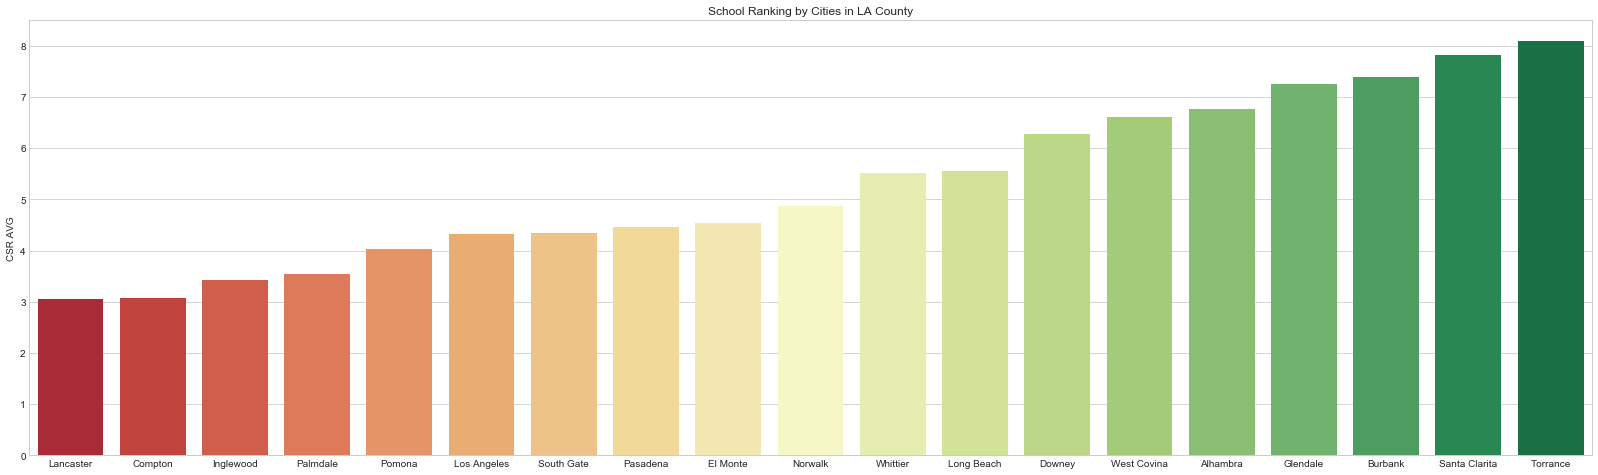

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(28,8))
sns.barplot(x="CITY", y="CSR_AVG", data=city_csr_df, palette=sns.color_palette("RdYlGn", 19))

plt.xlabel("")
plt.ylabel("CSR AVG")
plt.title("School Ranking by Cities in LA County")

# Save the figure
plt.savefig("School_Ranking_by_City.png")